# Unit 5 - Financial Planning


In [15]:
# Initializing imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import date

%matplotlib inline

In [16]:
# Loading .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [17]:
# Setting current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [18]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [19]:
# Fetching current BTC price
btc_info = requests.get(btc_url).json()
btc_current_price = btc_info['data']['1']['quotes']['USD']['price']

# Fetching current ETH price
eth_info = requests.get(eth_url).json()
eth_current_price = eth_info['data']['1027']['quotes']['USD']['price']

# Computing current value of my crpto
my_btc_value = btc_current_price * my_btc
my_eth_value = eth_current_price * my_eth

# Printing current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $41130.00
The current value of your 5.3 ETH is $10308.87


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [20]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [24]:
# Setting Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Creating the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [43]:
# Formatting current date as ISO format
todays_date = pd.Timestamp("2021-06-25", tz="America/New_York").isoformat()

# Setting the tickers
tickers = ["AGG", "SPY"]

# Setting timeframe to '1D' for Alpaca API
timeframe = "1D"

# Getting current closing prices for SPY and AGG
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=todays_date,
    end=todays_date,
).df

# Previewing DataFrame
ticker_data.head()


AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-06-25 00:00:00-04:00  115.11  115.13  114.7516  114.89  3987588  425.9   

                                                               
                               high     low   close    volume  
time                                                           
2021-06-25 00:00:00-04:00  427.0943  425.55  426.57  50460394

In [44]:
# Picking AGG and SPY close prices
agg_close_price = ticker_data['AGG']['close'].item()
spy_close_price = ticker_data['SPY']['close'].item()

# Printing AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.89
Current SPY closing price: $426.57


In [45]:
# Computing the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Printing current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21328.50
The current value of your 200 AGG shares is $22978.00


### Savings Health Analysis

In [71]:
# Setting monthly household income
monthly_income = 12000

# Creating savings DataFrame
total_crypto = round(my_btc_value + my_eth_value, 2)
total_shares = round(my_agg_value + my_spy_value, 2)
savings = {"savings": [total_crypto, total_shares]}
savings_df = pd.DataFrame(savings, index = ["crypto", "shares"])

# Displaying savings DataFrame
display(savings_df)

,savings
crypto,51438.87
shares,44306.50


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='savings'>

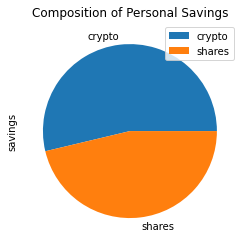

In [72]:
# Plotting savings pie chart
savings_df.plot.pie(y="savings", title="Composition of Personal Savings")

In [74]:
# Setting ideal emergency fund
emergency_fund = monthly_income * 3

# Calculating total amount of savings
total_savings = total_crypto + total_shares
amount_required = round(emergency_fund - total_savings, 2)

# Validating saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations of reaching your financial goal!")
else:
    print(f"Your emergency fund is ${amount_required} short.")

Congratulations of reaching your financial goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [62]:
# Setting start and end dates of five years back from today.
start_date = pd.Timestamp('2016-06-25', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-25', tz='America/New_York').isoformat()

In [75]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2017-07-07 00:00:00-04:00  108.89  108.9500  108.83  108.870  2536724  241.21   
2017-07-10 00:00:00-04:00  108.97  109.0200  108.89  108.960  1940466  241.95   
2017-07-11 00:00:00-04:00  108.97  109.1000  108.93  109.055  1613602  242.16   
2017-07-12 00:00:00-04:00  109.38  109.4300  109.26  109.380  1787218  243.30   
2017-07-13 00:00:00-04:00  109.29  109.3118  109.13  109.240  1432660  244.02   

                                                             
                             high     low   close    volume  
time                                                         
2017-07-07 00:00:00-04:00  242.28  241.02  242.10  36831437  
2017-07-10 00:00:00-04:00  242.80  241.76  242.36  27912725  
2017-07-11 00:00:00-04:00  242.55  240.85  242.16  40900622  
2017-07-12 00:00:00-04:00  244.20  243.30  243.98  38779965  
2017-07-13 00:00:00-04:00  244.55  243.76  244.41  29889284

In [77]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [78]:
# Printing the simulation input data
MC_30_year.portfolio_data.head() 

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2017-07-07 00:00:00-04:00  108.89  108.9500  108.83  108.870  2536724   
2017-07-10 00:00:00-04:00  108.97  109.0200  108.89  108.960  1940466   
2017-07-11 00:00:00-04:00  108.97  109.1000  108.93  109.055  1613602   
2017-07-12 00:00:00-04:00  109.38  109.4300  109.26  109.380  1787218   
2017-07-13 00:00:00-04:00  109.29  109.3118  109.13  109.240  1432660   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-07-07 00:00:00-04:00          NaN  241.21  242.28  241.02  242.10   
2017-07-10 00:00:00-04:00     0.000827  241.95  242.80  241.76  242.36   
2017-07-11 00:00:00-04:00     0.000872  242.16  242.55  240.85  242.16   
2017-07-12 00:00:00-04:00     0.002980  243.30  244.20  243.30  243.98   
2017-07-13 00:00:00-04:00    -0.001280  244.02  244.55  243.76  244.41   

                                                  
                             volume daily_return  
time                                              
2017-07-07 00:00:00-04:00  36831437          NaN  
2017-07-10 00:00:00-04:00  27912725     0.001074  
2017-07-11 00:00:00-04:00  40900622    -0.000825  
2017-07-12 00:00:00-04:00  38779965     0.007516  
2017-07-13 00:00:00-04:00  29889284     0.001762

In [79]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993994,0.993399,1.001667,0.990305,1.002810,0.993202,0.992161,1.001744,0.982088,1.005223,...,0.982639,0.998798,0.995563,1.004659,1.007164,1.005950,1.009242,0.990738,0.993344,0.996035
2,0.983924,1.005436,1.003902,0.996992,1.005260,0.995308,1.004093,1.002479,0.989342,0.999163,...,0.987730,1.002370,0.996220,1.015529,1.006862,1.003533,1.002856,1.002707,0.996845,0.983900
3,0.981787,1.006110,0.992606,1.000734,1.007955,0.988353,1.011197,0.993641,0.987470,0.985610,...,0.992618,0.989395,1.003828,1.007384,1.013033,1.023701,0.998086,0.992869,0.980099,0.991716
4,0.983581,1.017666,0.999215,0.998460,1.009176,0.994187,1.008091,0.988395,0.990107,1.000655,...,0.992191,0.989951,1.016151,1.005399,1.024283,1.020168,1.003710,0.994250,0.983308,1.011263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.226139,18.713956,13.194755,21.631992,4.954032,29.118171,30.749907,15.288267,15.346295,48.307700,...,7.247144,17.631018,17.296969,12.568207,8.607629,54.456342,13.312333,30.106998,12.795991,43.669660
7557,17.139894,18.771373,13.226951,21.712454,4.968456,29.561327,30.554459,15.229683,15.438653,48.260718,...,7.253803,17.759927,17.428671,12.487738,8.620770,54.981066,13.178211,29.771364,12.858795,43.210827
7558,16.981660,18.814010,13.262021,21.770211,4.940226,29.737372,30.457443,15.257128,15.308272,48.631218,...,7.228346,17.703670,17.343013,12.563867,8.707157,54.898457,13.241059,29.996368,12.960741,43.176514
7559,17.218599,19.124035,13.053566,21.776638,4.934176,29.542218,30.369827,15.189773,15.315878,48.990664,...,7.312028,17.577825,17.368180,12.642921,8.796220,54.798007,13.223997,29.763921,12.897357,42.898184


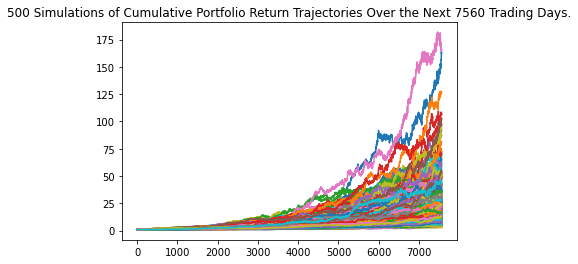

In [80]:
# Plotting simulation outcomes
line_plot = MC_30_year.plot_simulation()

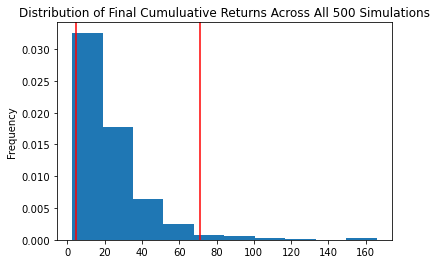

In [81]:
# Plotting probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [82]:
# Fetching summary statistics from the Monte Carlo simulation results
thirty_year_tbl = MC_30_year.summarize_cumulative_return()

# Printing summary statistics
print(thirty_year_tbl)

count           500.000000
mean             23.370605
std              19.684065
min               2.551809
25%              11.086733
50%              17.546547
75%              28.024633
max             165.841660
95% CI Lower      4.682745
95% CI Upper     71.353581
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [83]:
# Setting initial investment
initial_investment = 20000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
thirty_year_ci_lower = round(thirty_year_tbl[8]*20000, 2)
thrrty_year_ci_upper = round(thirty_year_tbl[9]*20000, 2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${thirty_year_ci_lower} and ${thrrty_year_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93654.9 and $1427071.63


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [84]:
# Setting initial investment
initial_investment = 20000 * 1.5

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
thirty_year_ci_lower = round(thirty_year_tbl[8]*(20000*1.5), 2)
thrrty_year_ci_upper = round(thirty_year_tbl[9]*(20000*1.5), 2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${thirty_year_ci_lower} and ${thrrty_year_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $140482.35 and $2140607.44


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [85]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_5_year.portfolio_data.head() 

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2017-07-07 00:00:00-04:00  108.89  108.9500  108.83  108.870  2536724   
2017-07-10 00:00:00-04:00  108.97  109.0200  108.89  108.960  1940466   
2017-07-11 00:00:00-04:00  108.97  109.1000  108.93  109.055  1613602   
2017-07-12 00:00:00-04:00  109.38  109.4300  109.26  109.380  1787218   
2017-07-13 00:00:00-04:00  109.29  109.3118  109.13  109.240  1432660   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-07-07 00:00:00-04:00          NaN  241.21  242.28  241.02  242.10   
2017-07-10 00:00:00-04:00     0.000827  241.95  242.80  241.76  242.36   
2017-07-11 00:00:00-04:00     0.000872  242.16  242.55  240.85  242.16   
2017-07-12 00:00:00-04:00     0.002980  243.30  244.20  243.30  243.98   
2017-07-13 00:00:00-04:00    -0.001280  244.02  244.55  243.76  244.41   

                                                  
                             volume daily_return  
time                                              
2017-07-07 00:00:00-04:00  36831437          NaN  
2017-07-10 00:00:00-04:00  27912725     0.001074  
2017-07-11 00:00:00-04:00  40900622    -0.000825  
2017-07-12 00:00:00-04:00  38779965     0.007516  
2017-07-13 00:00:00-04:00  29889284     0.001762

In [86]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999373,0.990311,1.000895,0.985513,1.001589,0.985563,0.996925,1.009778,1.007991,1.010349,...,0.995936,1.010897,0.997514,0.998091,0.992810,0.992417,1.004777,1.004954,0.996618,1.005445
2,0.991442,0.978884,1.017200,0.984057,1.004784,0.993324,0.998563,1.003292,1.000826,0.998975,...,0.993904,1.014176,1.006392,0.999960,0.987038,0.995641,1.001047,1.007956,0.996568,0.996253
3,0.992185,0.993262,1.010507,1.007831,1.000047,0.987092,1.005622,1.001071,1.019663,1.002866,...,0.989763,1.002748,1.009543,0.997692,0.995134,0.986076,1.002837,1.011011,1.002266,1.018885
4,0.978212,1.002904,1.005976,1.010409,1.004456,0.977151,1.004787,0.992286,1.012678,1.011341,...,0.988667,0.999284,0.998848,1.002097,1.002156,0.982139,1.012047,1.008800,1.002356,1.009142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.496458,1.252509,1.187547,1.071806,1.337923,1.329051,2.037992,1.089174,1.589159,2.655331,...,1.638911,1.318748,2.361785,1.441252,1.741463,2.268946,1.412844,1.721269,1.985631,2.041309
1257,1.512880,1.233655,1.188066,1.068331,1.340226,1.308235,2.065688,1.095674,1.592261,2.655608,...,1.650013,1.313671,2.362286,1.434139,1.743267,2.241499,1.420240,1.739161,1.971381,2.042699
1258,1.501647,1.249483,1.178944,1.080733,1.344759,1.304612,2.074814,1.088624,1.598790,2.700443,...,1.674615,1.331543,2.336380,1.435053,1.741584,2.248314,1.410241,1.731768,1.955324,2.014095
1259,1.513163,1.255899,1.198496,1.091285,1.335945,1.303764,2.067768,1.087470,1.592838,2.722037,...,1.681761,1.353247,2.343621,1.444157,1.768310,2.235909,1.419579,1.737383,1.927979,1.984739


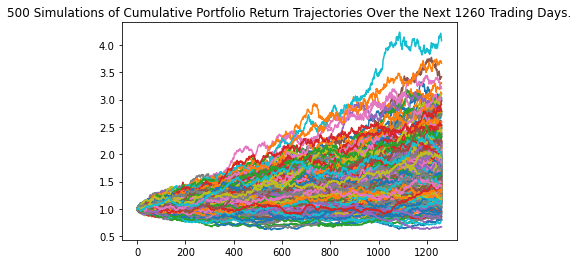

In [87]:
# Plotting simulation outcomes
five_year_line_plot = MC_5_year.plot_simulation()

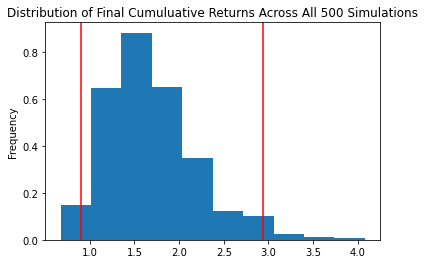

In [89]:
# Plotting probability distribution and confidence intervals
five_year_dist_plot = MC_5_year.plot_distribution()

In [90]:
# Fetching summary statistics from the Monte Carlo simulation results
five_year_tbl = MC_5_year.summarize_cumulative_return()

# Printing summary statistics
print(five_year_tbl)

count           500.000000
mean              1.687765
std               0.503530
min               0.672912
25%               1.340521
50%               1.618261
75%               1.958701
max               4.079262
95% CI Lower      0.905126
95% CI Upper      2.938747
Name: 1260, dtype: float64


In [91]:
# Setting initial investment
initial_investment = 20000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
five_year_ci_lower = round(five_year_tbl[8]*20000, 2)
five_year_ci_upper = round(five_year_tbl[9]*20000, 2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${five_year_ci_lower} and ${five_year_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18102.52 and $58774.94


### Ten Years Retirement Option

In [92]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_10_year.portfolio_data.head() 

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2017-07-07 00:00:00-04:00  108.89  108.9500  108.83  108.870  2536724   
2017-07-10 00:00:00-04:00  108.97  109.0200  108.89  108.960  1940466   
2017-07-11 00:00:00-04:00  108.97  109.1000  108.93  109.055  1613602   
2017-07-12 00:00:00-04:00  109.38  109.4300  109.26  109.380  1787218   
2017-07-13 00:00:00-04:00  109.29  109.3118  109.13  109.240  1432660   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-07-07 00:00:00-04:00          NaN  241.21  242.28  241.02  242.10   
2017-07-10 00:00:00-04:00     0.000827  241.95  242.80  241.76  242.36   
2017-07-11 00:00:00-04:00     0.000872  242.16  242.55  240.85  242.16   
2017-07-12 00:00:00-04:00     0.002980  243.30  244.20  243.30  243.98   
2017-07-13 00:00:00-04:00    -0.001280  244.02  244.55  243.76  244.41   

                                                  
                             volume daily_return  
time                                              
2017-07-07 00:00:00-04:00  36831437          NaN  
2017-07-10 00:00:00-04:00  27912725     0.001074  
2017-07-11 00:00:00-04:00  40900622    -0.000825  
2017-07-12 00:00:00-04:00  38779965     0.007516  
2017-07-13 00:00:00-04:00  29889284     0.001762

In [93]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001545,0.985590,0.994715,1.001261,0.989446,1.015284,1.018798,1.004276,0.993903,1.006938,...,1.009832,1.014792,0.990478,0.996717,0.989162,1.003544,1.016295,0.994000,0.999237,0.993391
2,0.980867,0.999147,0.992718,0.992013,0.994796,1.006692,1.015979,1.030086,1.001312,1.011343,...,1.016030,1.010256,0.980059,0.993036,1.003941,1.013321,1.027782,0.990365,0.993331,0.981686
3,0.971605,1.001115,0.983812,0.990342,0.984074,1.006307,1.030087,1.053305,0.998799,1.017443,...,1.024752,1.016767,0.978304,0.991172,1.013600,1.010028,1.047931,0.988677,0.991750,0.999429
4,0.965922,0.993252,0.993426,0.985870,0.977115,0.992519,1.043057,1.044175,1.009733,1.019162,...,1.022620,1.012737,1.000256,0.995156,1.015177,1.010946,1.044091,0.995442,0.989203,0.985917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.646504,2.427923,2.244695,2.651470,2.084587,1.584358,2.589552,2.059449,2.173307,2.928489,...,5.925026,2.963341,2.013606,2.058983,1.488286,1.327932,1.967156,1.254645,2.903524,2.047651
2517,7.650699,2.442794,2.248124,2.671934,2.127969,1.606212,2.618526,2.067053,2.179597,2.956523,...,6.005411,2.994592,2.028955,2.071815,1.516517,1.310125,1.976654,1.257876,2.858166,2.049638
2518,7.564575,2.463242,2.253150,2.659727,2.120524,1.608053,2.624440,2.052482,2.165201,2.966294,...,6.088268,2.992832,2.049999,2.039307,1.526376,1.301003,2.020017,1.258446,2.902295,2.021705
2519,7.555204,2.461257,2.289375,2.675439,2.123580,1.593020,2.621841,2.074835,2.163491,2.976425,...,6.049548,3.001951,2.038091,2.052964,1.520332,1.305584,2.013261,1.258568,2.887419,2.034321


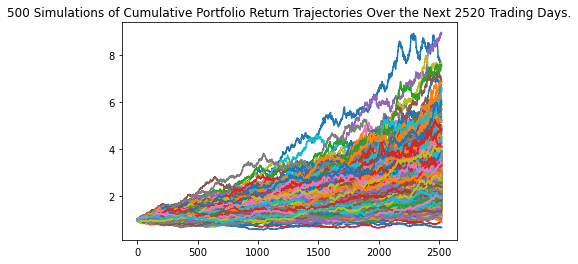

In [94]:
# Plotting simulation outcomes
ten_year_line_plot = MC_10_year.plot_simulation()

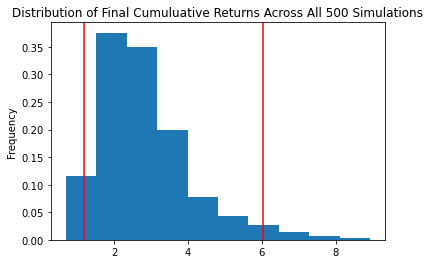

In [95]:
# Plotting probability distribution and confidence intervals
ten_year_dist_plot = MC_10_year.plot_distribution()

In [96]:
# Fetching summary statistics from the Monte Carlo simulation results
ten_year_tbl = MC_10_year.summarize_cumulative_return()

# Printing summary statistics
print(ten_year_tbl)

count           500.000000
mean              2.841934
std               1.233167
min               0.686743
25%               2.016135
50%               2.589943
75%               3.432760
max               8.939411
95% CI Lower      1.190458
95% CI Upper      6.031547
Name: 2520, dtype: float64


In [98]:
# Setting initial investment
initial_investment = 20000

# Useing the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ten_year_ci_lower = round(ten_year_tbl[8]*20000, 2)
ten_year_ci_upper = round(ten_year_tbl[9]*20000, 2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ten_year_ci_lower} and ${ten_year_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $23809.15 and $120630.94
